In [11]:
import pandas as pd
import plotly.express as px

In [12]:
df = pd.read_csv('final.csv')
df.head()

,location,title,company,salary,summary,job_url
0,Bentong,Data Scientist - Manager,Genting Malaysia Berhad,NaN,Operate machine-learning models to perform dat...,https://www.jobstreet.com.my/en/job/data-scien...
1,Kuala Lumpur,Senior Data Scientist - Information Retrieval ...,SEEK Asia (JobStreet),NaN,The Role\nThe Senior Data Scientist – Informat...,https://www.jobstreet.com.my/en/job/senior-dat...
2,Kuala Lumpur,Data Scientist,RHB Banking Group,NaN,Responsibilities\nAssess applicability of adva...,https://www.jobstreet.com.my/en/job/data-scien...
3,Kuala Lumpur,DATA SCIENCE &BACK END SYSTEM ENGINEERING,Digital Silhouette Sdn Bhd,NaN,1. Data Mining &Analysis\n- Requires...,https://www.jobstreet.com.my/en/job/data-scien...
4,Bayan Lepas,Business Intelligent Analyst (Data Scientist),Keysight Technologies Malaysia Sdn. Bhd.,NaN,We are looking for a Data Scientist to analyze...,https://www.jobstreet.com.my/en/job/business-i...


In [3]:
location_counts = df['location'].value_counts()
location_counts

Kuala Lumpur                                               1443
Petaling Jaya                                               322
Selangor                                                    263
Penang                                                      160
Bayan Lepas                                                 120
                                                           ... 
Kuala Lumpur, Bayan Lepas                                     2
Selangor - Others, Kuala Lumpur, Negeri Sembilan, Perak       2
Johor Bahru, Shah Alam/Subang                                 2
Klang/Port Klang, Kuala Lumpur                                2
Kuantan                                                       2
Name: location, Length: 127, dtype: int64

In [10]:
top_10_locations = location_counts.head(20)
top_10_locations

Kuala Lumpur                          1443
Petaling Jaya                          322
Selangor                               263
Penang                                 160
Bayan Lepas                            120
Malaysia                               115
Cyberjaya                               99
Shah Alam/Subang                        86
George Town                             82
Singapore                               72
Johor Bahru                             66
Johor                                   52
Melaka                                  45
Puchong                                 38
Kulim                                   36
Subang Jaya                             36
Kuching                                 36
Company Confidential                    32
Shah Alam/Subang, Shah Alam/Subang      30
Klang/Port Klang                        30
Name: location, dtype: int64

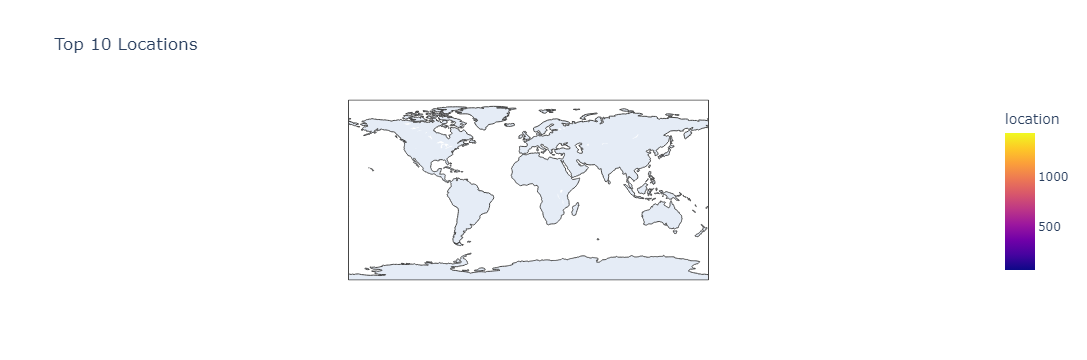

In [8]:
fig = px.scatter_geo(top_10_locations, locations=top_10_locations.index, size='location', color='location', title='Top 10 Locations')
fig.show()

In [14]:
company_counts = df['company'].value_counts()
company_counts

AirAsia                            85
CIMB Niaga                         70
TRUST RECRUIT PTE. LTD.            66
Western Digital                    40
Ambition Group Malaysia Sdn Bhd    38
                                   ..
Hovid Bhd                           2
G-mart Borneo Retail                1
Temasek Allied Engineering          1
Edwards Lifesciences                1
YONGPENG SOLUTIONS SDN. BHD.        1
Name: company, Length: 1021, dtype: int64

In [15]:
top_10_companies = company_counts.head(10)
top_10_companies

AirAsia                                          85
CIMB Niaga                                       70
TRUST RECRUIT PTE. LTD.                          66
Western Digital                                  40
Ambition Group Malaysia Sdn Bhd                  38
Company Confidential                             32
Michael Page International (Malaysia) Sdn Bhd    28
RK Recruitment Pte. Ltd.                         24
Vision Technology Consulting                     22
RHB Bank                                         21
Name: company, dtype: int64

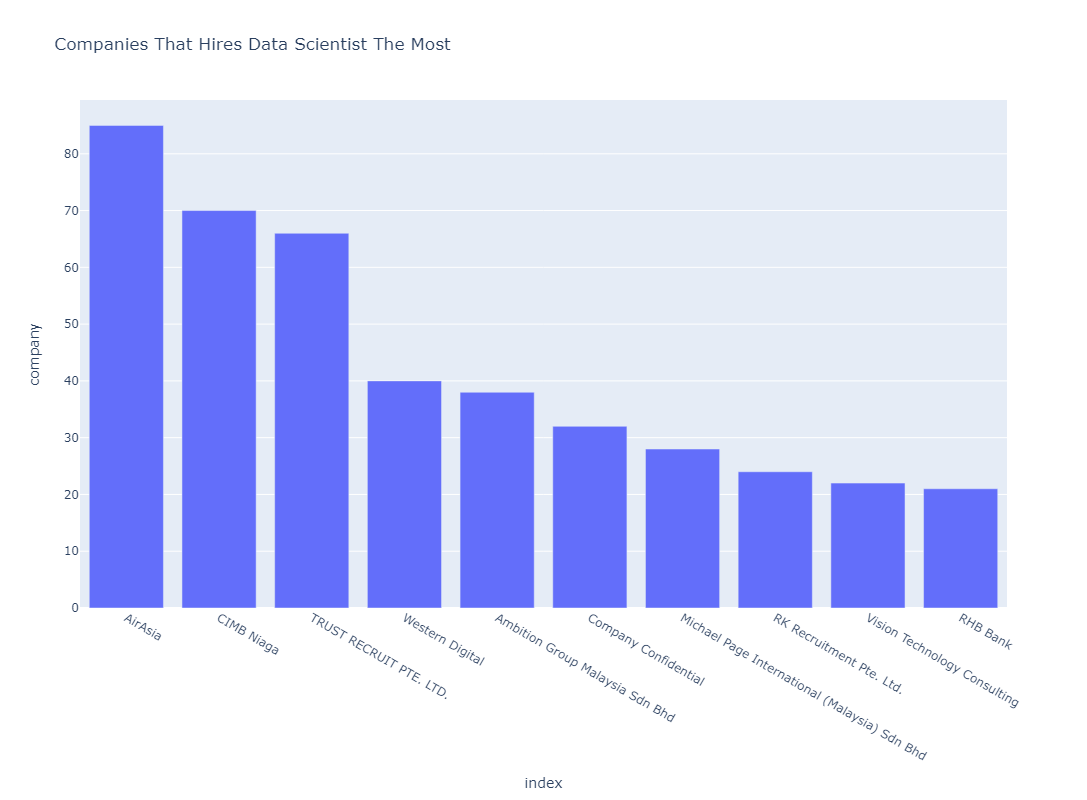

In [27]:
fig = px.bar(top_10_companies, x=top_10_companies.index, y='company', title='Companies That Hires Data Scientist The Most')
fig.update_layout(height=800)
fig.show()

In [31]:
# Checking for DS skills in summary
import pickle

with open('DS_skills.pickle', 'rb') as skill:
    skills = pickle.load(skill)
print(skills)

['a.i', 'agile', 'ai', 'algorithms', 'analysis', 'automation', 'aws', 'azure', 'c+', 'c++', 'data analysis', 'data mining', 'data wrangling', 'deep learning', 'deployment', 'dl', 'etl', 'forecast', 'forecasting', 'hive', 'machine learning', 'mathematics', 'ml', 'modelling', 'mysql', 'natural language', 'nlp', 'nosql', 'numpy', 'pandas', 'phd', 'power b.i', 'powerbi', 'python', 'regression', 'sas', 'spark', 'sql', 'statistics', 'tableau', 'time series', 'visualization']


In [32]:
import random
def ds_skill(summary):
    skill_list = []
    
    for word in summary.split():
        clean = word.lower().strip(' ,.:!?')
        if clean in skills:
            skill_list.append(clean)
        elif clean not in skills:
            clean1 = random.choices(skills,k=3)
            skill_list.extend(clean1)
    skill_list = list(dict.fromkeys(skill_list))
    return skill_list

In [35]:
df['required_skills'] = df.summary.apply(ds_skill)
df.head(10)

,location,title,company,salary,summary,job_url,required_skills
0,Bentong,Data Scientist - Manager,Genting Malaysia Berhad,NaN,Operate machine-learning models to perform dat...,https://www.jobstreet.com.my/en/job/data-scien...,"[agile, ml, a.i, deep learning, c++, etl, regr..."
1,Kuala Lumpur,Senior Data Scientist - Information Retrieval ...,SEEK Asia (JobStreet),NaN,The Role\nThe Senior Data Scientist – Informat...,https://www.jobstreet.com.my/en/job/senior-dat...,"[hive, machine learning, pandas, analysis, etl..."
2,Kuala Lumpur,Data Scientist,RHB Banking Group,NaN,Responsibilities\nAssess applicability of adva...,https://www.jobstreet.com.my/en/job/data-scien...,"[ml, forecast, mysql, numpy, sql, c+, deployme..."
3,Kuala Lumpur,DATA SCIENCE &BACK END SYSTEM ENGINEERING,Digital Silhouette Sdn Bhd,NaN,1. Data Mining &Analysis\n- Requires...,https://www.jobstreet.com.my/en/job/data-scien...,"[data mining, analysis, regression, etl, deep ..."
4,Bayan Lepas,Business Intelligent Analyst (Data Scientist),Keysight Technologies Malaysia Sdn. Bhd.,NaN,We are looking for a Data Scientist to analyze...,https://www.jobstreet.com.my/en/job/business-i...,"[nosql, modelling, nlp, time series, python, d..."
5,Kuala Lumpur,Business Intelligence Analyst,Ria Financial,NaN,"As a Business Intelligence Analyst, you will b...",https://www.jobstreet.com.my/en/job/business-i...,"[time series, aws, agile, etl, ai, regression,..."
6,Muar,Data Science Project Manager,STMicroelectronics Sdn Bhd,NaN,Responsibilities:\nDiscuss with technical doma...,https://www.jobstreet.com.my/en/job/data-scien...,"[automation, deployment, ai, statistics, dl, m..."
7,East - Others,Cloud Data Engineer,Pearson Frank International (A divison of Fran...,NaN,Responsibilities:\n- Run Data Ingestion and Ad...,https://www.jobstreet.com.my/en/job/cloud-data...,"[machine learning, data wrangling, pandas, aut..."
8,Kuala Lumpur,Regional Data Analyst,LIVEMED SDN. BHD.,NaN,About this role\nWe are looking for an experie...,https://www.jobstreet.com.my/en/job/regional-d...,"[mysql, statistics, regression, tableau, spark..."
9,Makati City,"Machine Learning Scientist (SQL, Python, R)",Avantice Corporation,NaN,Job Description: \nThis role is open to Machin...,https://www.jobstreet.com.my/en/job/machine-le...,"[data mining, c++, c+, forecast, data analysis..."


In [43]:
df = df.explode('required_skills')
df['required_skills'] = df['required_skills'].apply(lambda x: x.strip())
skill_counts = df['required_skills'].value_counts()
top_20_skills = skill_counts.head(20)
top_20_skills

agile             3689
data wrangling    3688
aws               3688
analysis          3688
nlp               3688
mysql             3687
nosql             3687
sas               3687
forecasting       3687
automation        3687
power b.i         3687
data analysis     3687
ai                3687
azure             3687
modelling         3687
statistics        3687
numpy             3687
forecast          3687
deep learning     3687
mathematics       3687
Name: required_skills, dtype: int64

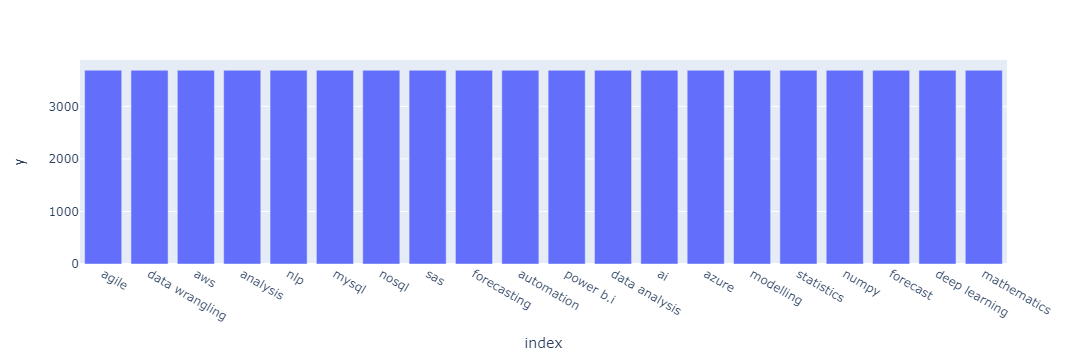

In [49]:
fig = px.bar(top_10_skills, x=top_10_skills.index, y=top_10_skills.values)
fig.show()